In [ ]:
import numpy as np
import pandas as pd
'''
this function takes the path to a csv file and the best arm indexes as input
it returns the probability of each arm being the best arm at each time point
Used for comparison with the experimental results in this paper.
'''

def get_accuracy_bandit(fp, best_arm_indexes):
    df = pd.read_csv(fp)
    df = df[['num_sims', 'horizon', 'chosen_arm']]
    n_simulations = int(np.max(df['num_sims'])) + 1
    time_horizon = int(np.max(df['horizon'])) + 1
    best_arms = np.zeros((n_simulations, time_horizon))  # each time point will have a best arm up to that point
    for n in range(int(n_simulations)):
        data = np.array(list(df.loc[df['num_sims'] == n]['chosen_arm']))
        for t in range(len(data)):
            u, counts = np.unique(data[:t+1], return_counts=True)
            best_arms[n, t] = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
    isinfunc = lambda x: x in best_arm_indexes
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    probs = boo.sum(axis=0)/n_simulations
    return probs
#this data come from paper of [Identifying general reaction conditions by bandit optimization]-reference [18]
dir_path = r'C:\Users\Administrator\Desktop\supply data\Basic experiment\bandit\deoxyfluorination_bayes_ucb_gaussian\log.csv'
deoxyf = get_accuracy_bandit(dir_path,[14, 19])
print(deoxyf)

[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.065  0.09   0.0525 0.0525 0.0475 0.1175
 0.21   0.2225 0.21   0.2375 0.2275 0.2525 0.2525 0.29   0.3125 0.2625
 0.315  0.315  0.345  0.36   0.3775 0.4    0.4025 0.4375 0.4125 0.4075
 0.435  0.425  0.4425 0.43   0.4425 0.4225 0.435  0.4525 0.46   0.475
 0.49   0.485  0.515  0.5125 0.51   0.515  0.5225 0.5225 0.53   0.535
 0.535  0.5425 0.5575 0.5575 0.5425 0.5525 0.545  0.575  0.5775 0.595
 0.595  0.5925 0.5925 0.6    0.595  0.615  0.615  0.625  0.6225 0.635
 0.6275 0.635  0.6375 0.635  0.6375 0.6475 0.66   0.655  0.65   0.66
 0.675  0.6775 0.675  0.6775 0.6925 0.695  0.715  0.705  0.7175 0.72  ]


In [ ]:
import numpy as np
import pandas as pd
def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]
    n_simulations = df['sim'].max()  
    time_horizon = df['horizon'].max()  
    best_arms = np.empty((n_simulations, time_horizon), dtype=object)
    for sim in range(1, n_simulations + 1): 
        data = df[df['sim'] == sim]['condition'].values
        for t in range(len(data)): 
            u, counts = np.unique(data[:t+1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition
    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    boo=pd.DataFrame(boo)
    probs = boo.sum(axis=0)/n_simulations
    return probs
best_conditions=['BTMG+PBSF','BTPP+PBSF']
# this reult is the model in this paper(single multi-armed bandit algorithm)
dir_path = r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Deoxyfluorination\results\BayesUCBGaussian.csv'
deoxyf2 = get_accuracy_bandit_model(dir_path,best_conditions)
print(deoxyf2)

0     0.0000
1     0.0000
2     0.0000
3     0.0000
4     0.0000
       ...  
95    0.6100
96    0.6150
97    0.6175
98    0.6050
99    0.6075
Length: 100, dtype: float64


In [ ]:
import numpy as np
import pandas as pd
def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]
    n_simulations = df['sim'].max()  
    time_horizon = df['horizon'].max()  
    best_arms = np.empty((n_simulations, time_horizon), dtype=object)
    for sim in range(1, n_simulations + 1): 
        data = df[df['sim'] == sim]['condition'].values
        # print(data)
        for t in range(len(data)): 
            u, counts = np.unique(data[:t+1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition
    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    boo=pd.DataFrame(boo)
    probs = boo.sum(axis=0)/n_simulations
    return probs
best_conditions=['BTMG+PBSF','BTPP+PBSF']
encondings=['mordred','EI','CM','One-hot','Morgan']
models=['Gaussian_process','decision_tree','Random_forest','knn','svm',]
# this reult is the model in this paper(multi-armed bandit+regression)[BiDir-GRCO]
bins=[]
path=r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Deoxyfluorination\results'
for model in models:
    for enconding in encondings:
        bin=get_accuracy_bandit_model(path+f'\{model}_history_400_{enconding}.csv', best_conditions)
        print(f'{model}_{enconding}',bin)
        bins.append(bin)

Gaussian_process_mordred 0     0.0000
1     0.0000
2     0.0000
3     0.0000
4     0.0000
       ...  
95    0.7125
96    0.7100
97    0.7125
98    0.7175
99    0.7200
Length: 100, dtype: float64
Gaussian_process_EI 0     0.0000
1     0.0000
2     0.0000
3     0.0000
4     0.0000
       ...  
95    0.7525
96    0.7575
97    0.7575
98    0.7625
99    0.7650
Length: 100, dtype: float64
Gaussian_process_CM 0     0.0000
1     0.0000
2     0.0000
3     0.0000
4     0.0000
       ...  
95    0.7150
96    0.7150
97    0.7150
98    0.7225
99    0.7200
Length: 100, dtype: float64
Gaussian_process_One-hot 0     0.0000
1     0.0000
2     0.0000
3     0.0000
4     0.0000
       ...  
95    0.7050
96    0.7050
97    0.7150
98    0.7175
99    0.7175
Length: 100, dtype: float64
Gaussian_process_Morgan 0     0.0000
1     0.0000
2     0.0000
3     0.0000
4     0.0000
       ...  
95    0.7900
96    0.7875
97    0.7900
98    0.7925
99    0.7900
Length: 100, dtype: float64
decision_tree_mordred 0     0.0

# Different encodings and models are compared with the experimental results reported in reference [18].

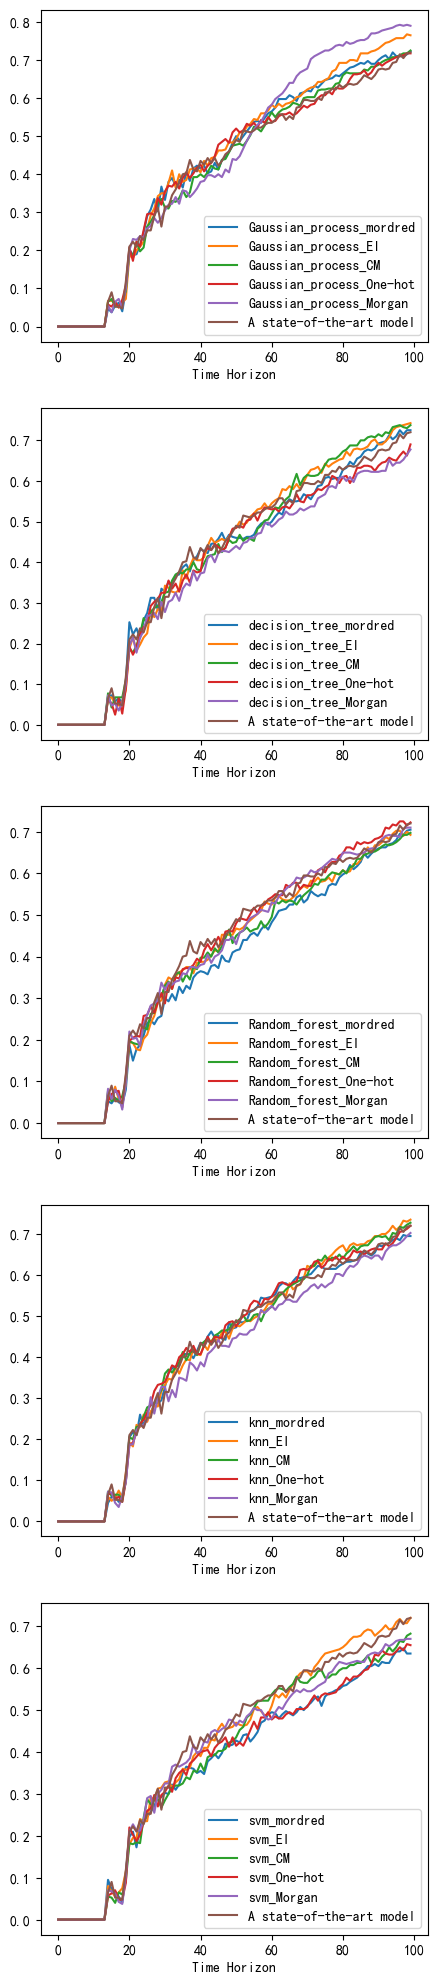

In [30]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
# import seaborn as sns
plt.figure(figsize=(5, 25))
# sns.set(style='whitegrid')
for i in range(len(models)):
    plt.subplot(len(models), 1, i+1)

    for j in range(len(encondings)):

        plt.plot(bins[i*len(encondings)+j], label=f'{models[i]}_{encondings[j]}')
    plt.plot(deoxyf, label='A state-of-the-art model')
    plt.legend()
    plt.xlabel('Time Horizon')

# Different encodings and models are compared with the experimental results reported in this paper (single bandit) 

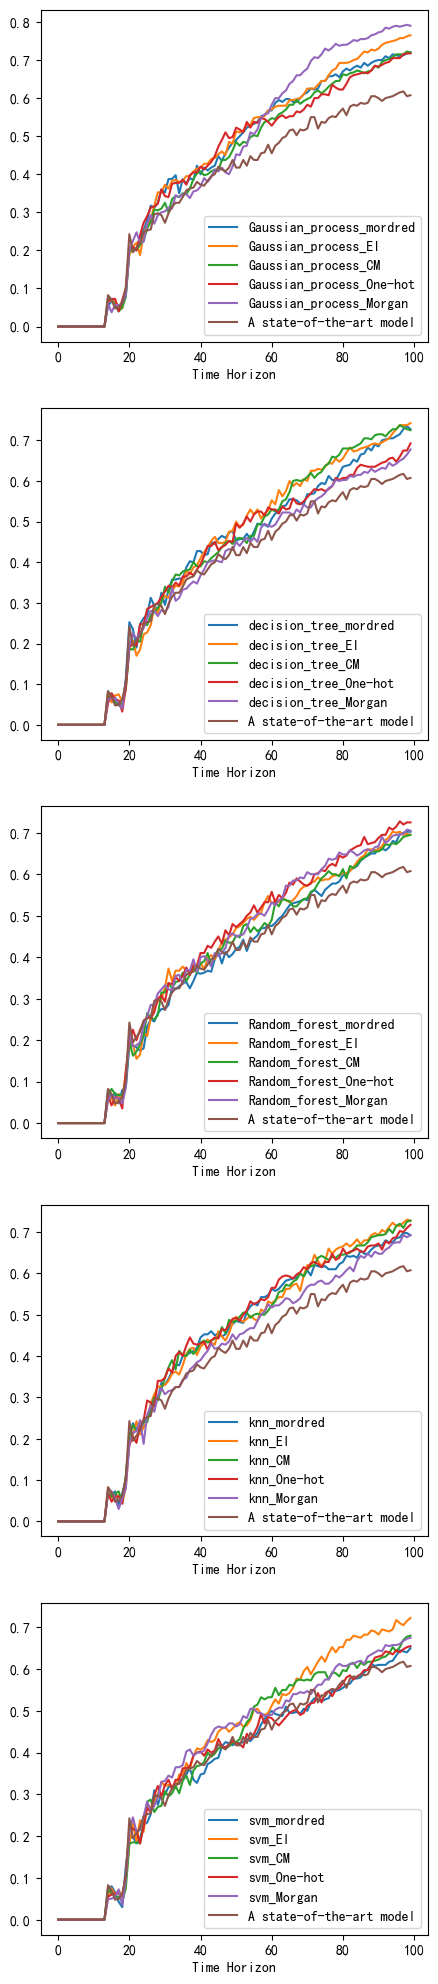

In [34]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
# import seaborn as sns
plt.figure(figsize=(5, 25))
# sns.set(style='whitegrid')
for i in range(len(models)):
    plt.subplot(len(models), 1, i+1)

    for j in range(len(encondings)):

        plt.plot(bins[i*len(encondings)+j], label=f'{models[i]}_{encondings[j]}')
    plt.plot(deoxyf2, label='A state-of-the-art model')
    plt.legend()
    plt.xlabel('Time Horizon')